In [2]:
%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
import src.mnist

In [4]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB
from sklearn.mixture import GaussianMixture

In [5]:
train_set, test_set, validation_set = src.mnist.get_mnist_full()

dtype: <class 'numpy.float64'>
dtype: <class 'numpy.float64'>


In [6]:
pca = PCA(n_components=100)
pca.fit(train_set.images)

PCA(copy=True, iterated_power='auto', n_components=100, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [9]:
train_images_pca = pca.transform(train_set.images)
test_images_pca = pca.transform(test_set.images)

In [117]:
train_counter = np.bincount(train_set.labels)
test_counter = np.bincount(test_set.labels)

train_images_pca_sorted = []
test_images_pca_sorted = []

for i in range(0, 10):
    local_train_images_pca = np.zeros((train_counter[i], 100))
    local_test_images_pca = np.zeros((test_counter[i], 100))
    
    k = 0
    for j in range(0, train_set.images.shape[0]):
        if train_set.labels[j] == i:
            local_train_images_pca[k, :] = train_images_pca[j]
            k += 1
            
    k = 0
    for j in range(0, test_set.images.shape[0]):
        if test_set.labels[j] == i:
            local_test_images_pca[k, :] = test_images_pca[j]
            k += 1
    
    train_images_pca_sorted.append(local_train_images_pca)
    test_images_pca_sorted.append(local_test_images_pca)

In [118]:
gaussian_mixtures = []
for i in range(0, 10):
    gaussian_mixture = GaussianMixture(n_components=10, verbose=2)
    gaussian_mixture.fit(train_images_pca_sorted[i])
    gaussian_mixtures.append(gaussian_mixture)

Initialization 0
  Iteration 0	 time lapse 0.31348s	 ll change inf
  Iteration 10	 time lapse 1.07056s	 ll change 0.64696
  Iteration 20	 time lapse 1.06250s	 ll change 0.01731
  Iteration 30	 time lapse 1.21644s	 ll change 0.00293
Initialization converged: True	 time lapse 3.77122s	 ll -540.64882
Initialization 0
  Iteration 0	 time lapse 0.34911s	 ll change inf
  Iteration 10	 time lapse 1.40329s	 ll change 0.25552
  Iteration 20	 time lapse 1.30393s	 ll change 0.03102
  Iteration 30	 time lapse 2.80975s	 ll change 0.08384
Initialization converged: True	 time lapse 6.65020s	 ll -371.69178
Initialization 0
  Iteration 0	 time lapse 0.42857s	 ll change inf
  Iteration 10	 time lapse 2.83331s	 ll change 0.05372
  Iteration 20	 time lapse 1.56390s	 ll change 0.00088
Initialization converged: True	 time lapse 4.82617s	 ll -563.27027
Initialization 0
  Iteration 0	 time lapse 0.36011s	 ll change inf
  Iteration 10	 time lapse 1.54624s	 ll change 0.11496
  Iteration 20	 time lapse 1.32954s	

Populating the interactive namespace from numpy and matplotlib


/home/james/.pyenv/versions/3.5.0/envs/mnist/lib/python3.5/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['f']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


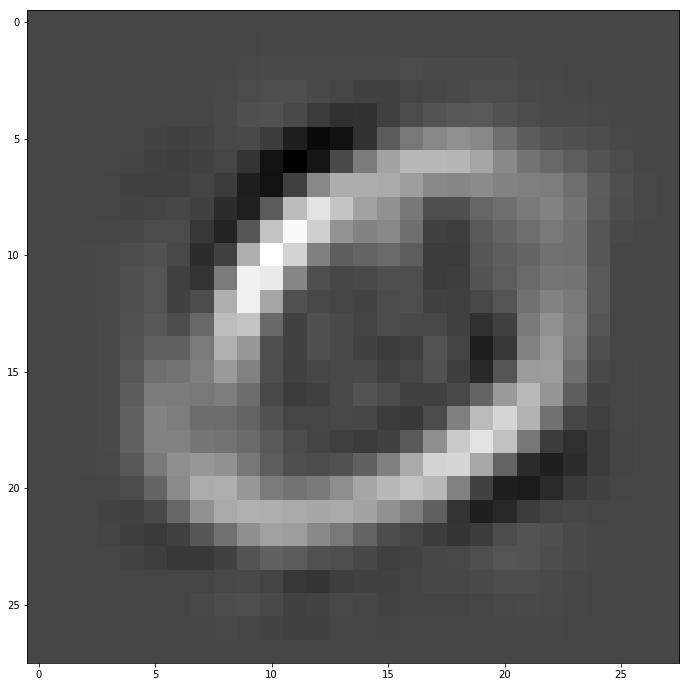

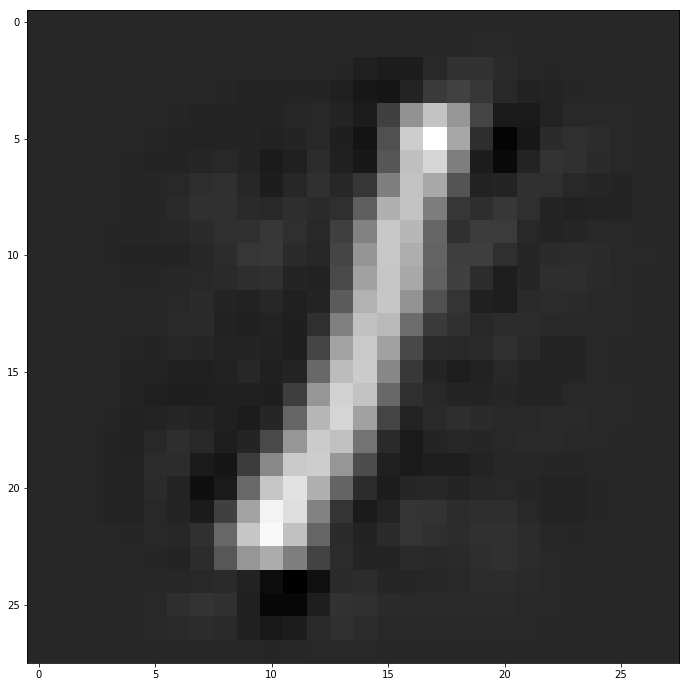

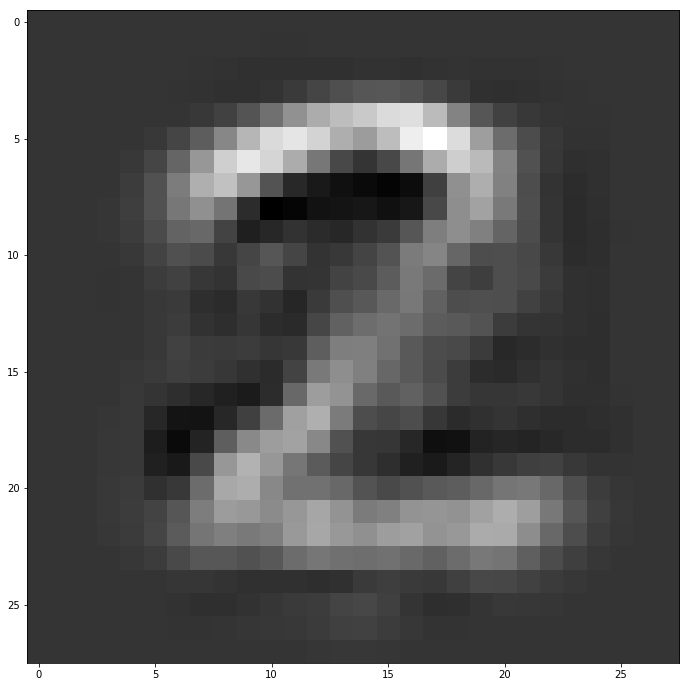

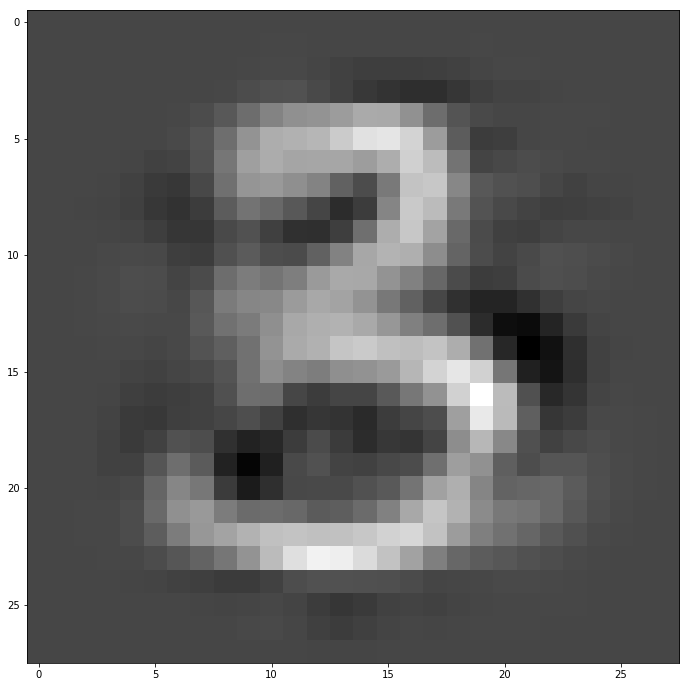

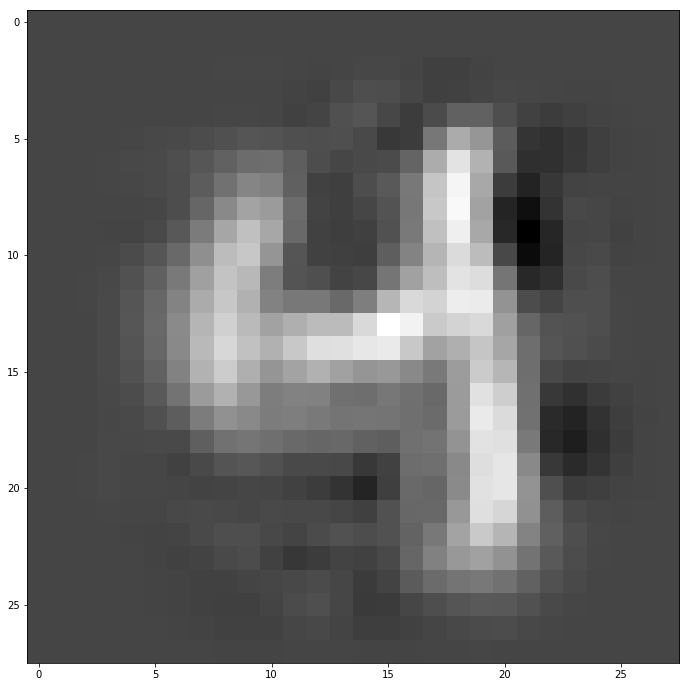

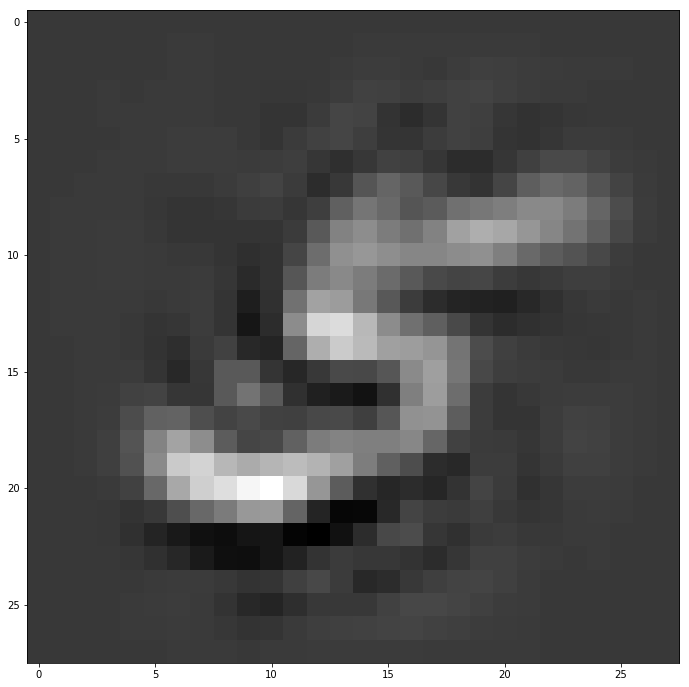

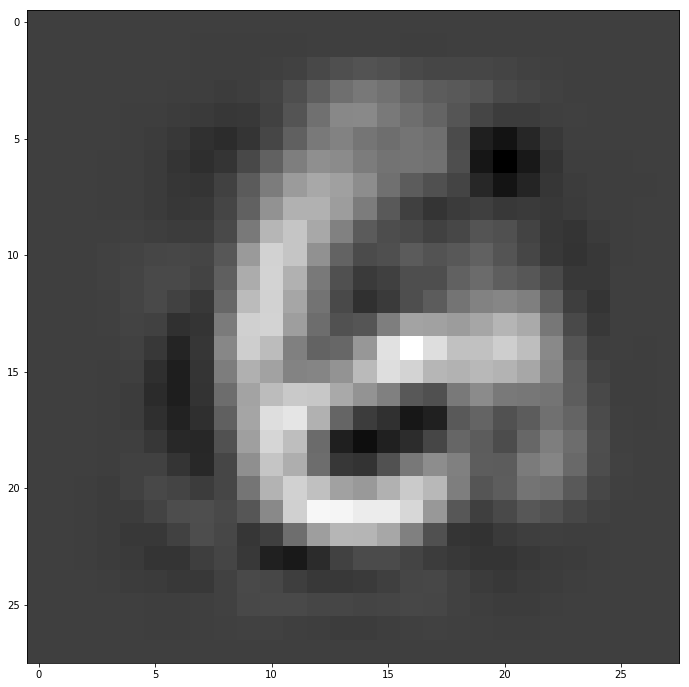

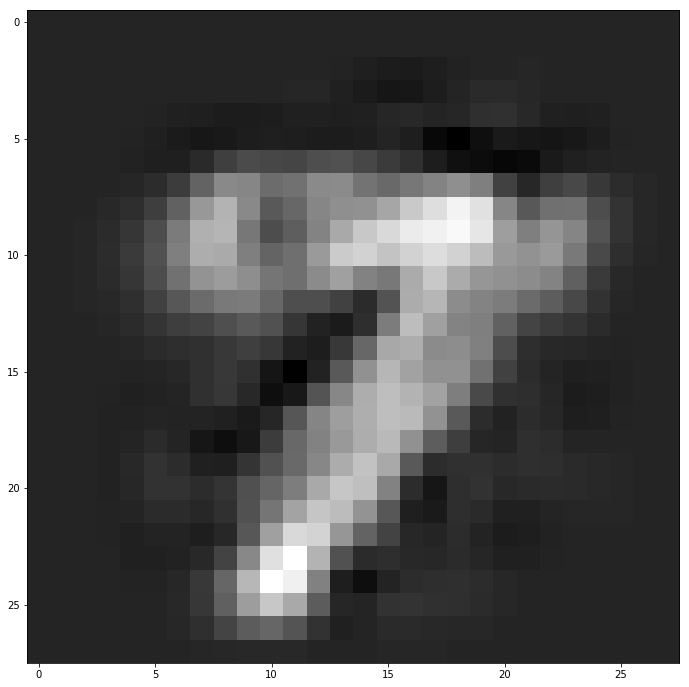

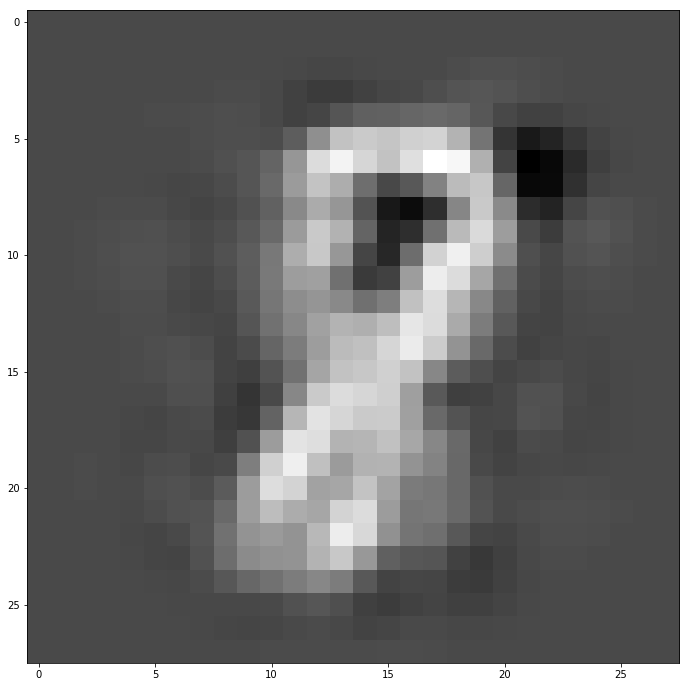

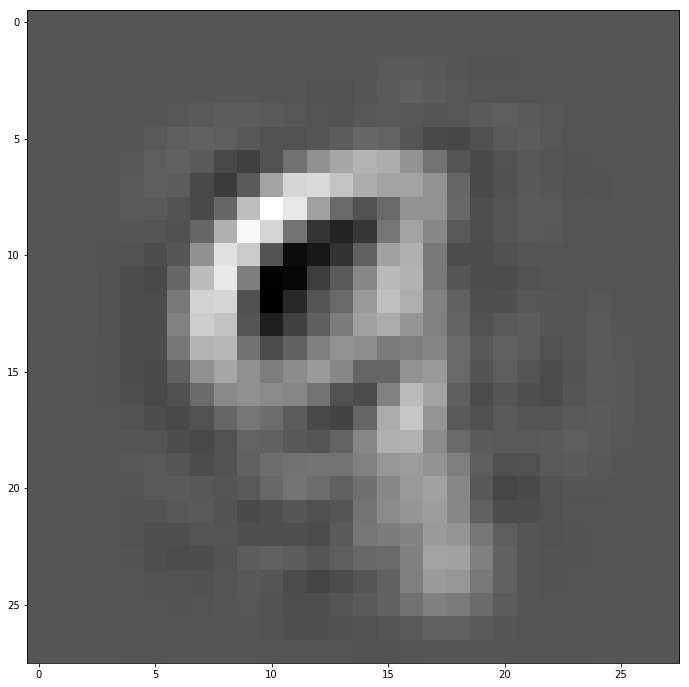

In [124]:
%pylab inline
pylab.rcParams['figure.figsize'] = (12, 12)

for i in range(0, 10):
    sample_value = gaussian_mixtures[i].sample()[0][0]

    plt.imshow(np.reshape(pca.inverse_transform(sample_value) + 123, (train_set.rows, train_set.cols)), cmap='gray')
    plt.grid(False)
    plt.show()

Populating the interactive namespace from numpy and matplotlib


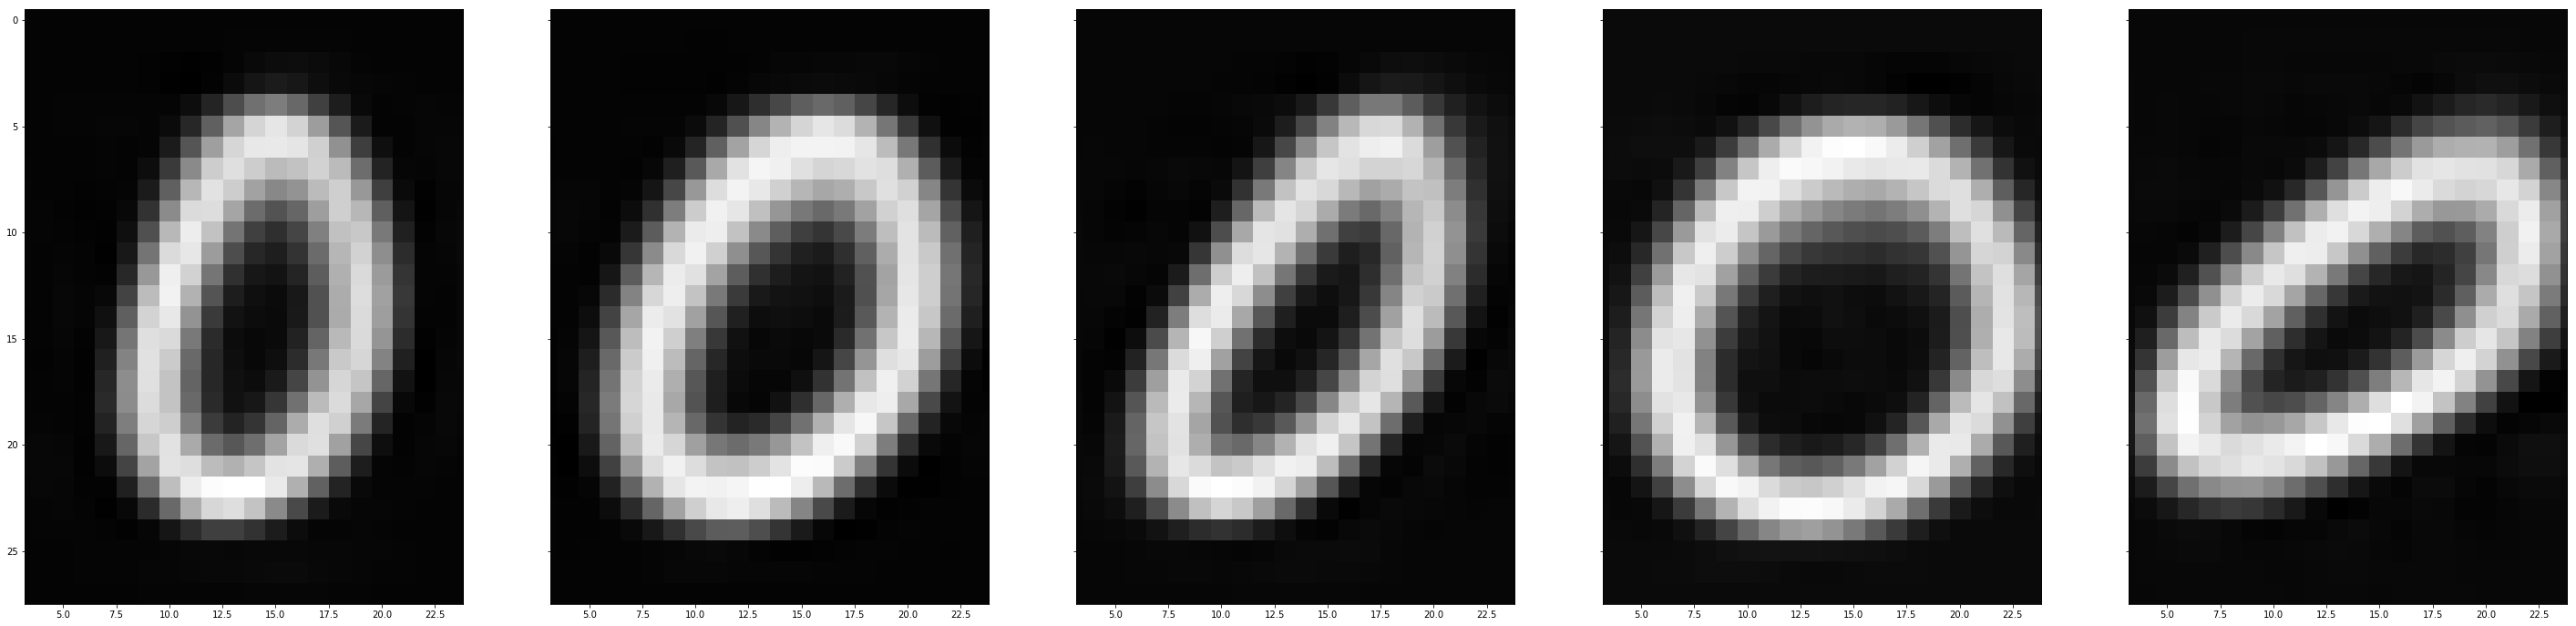

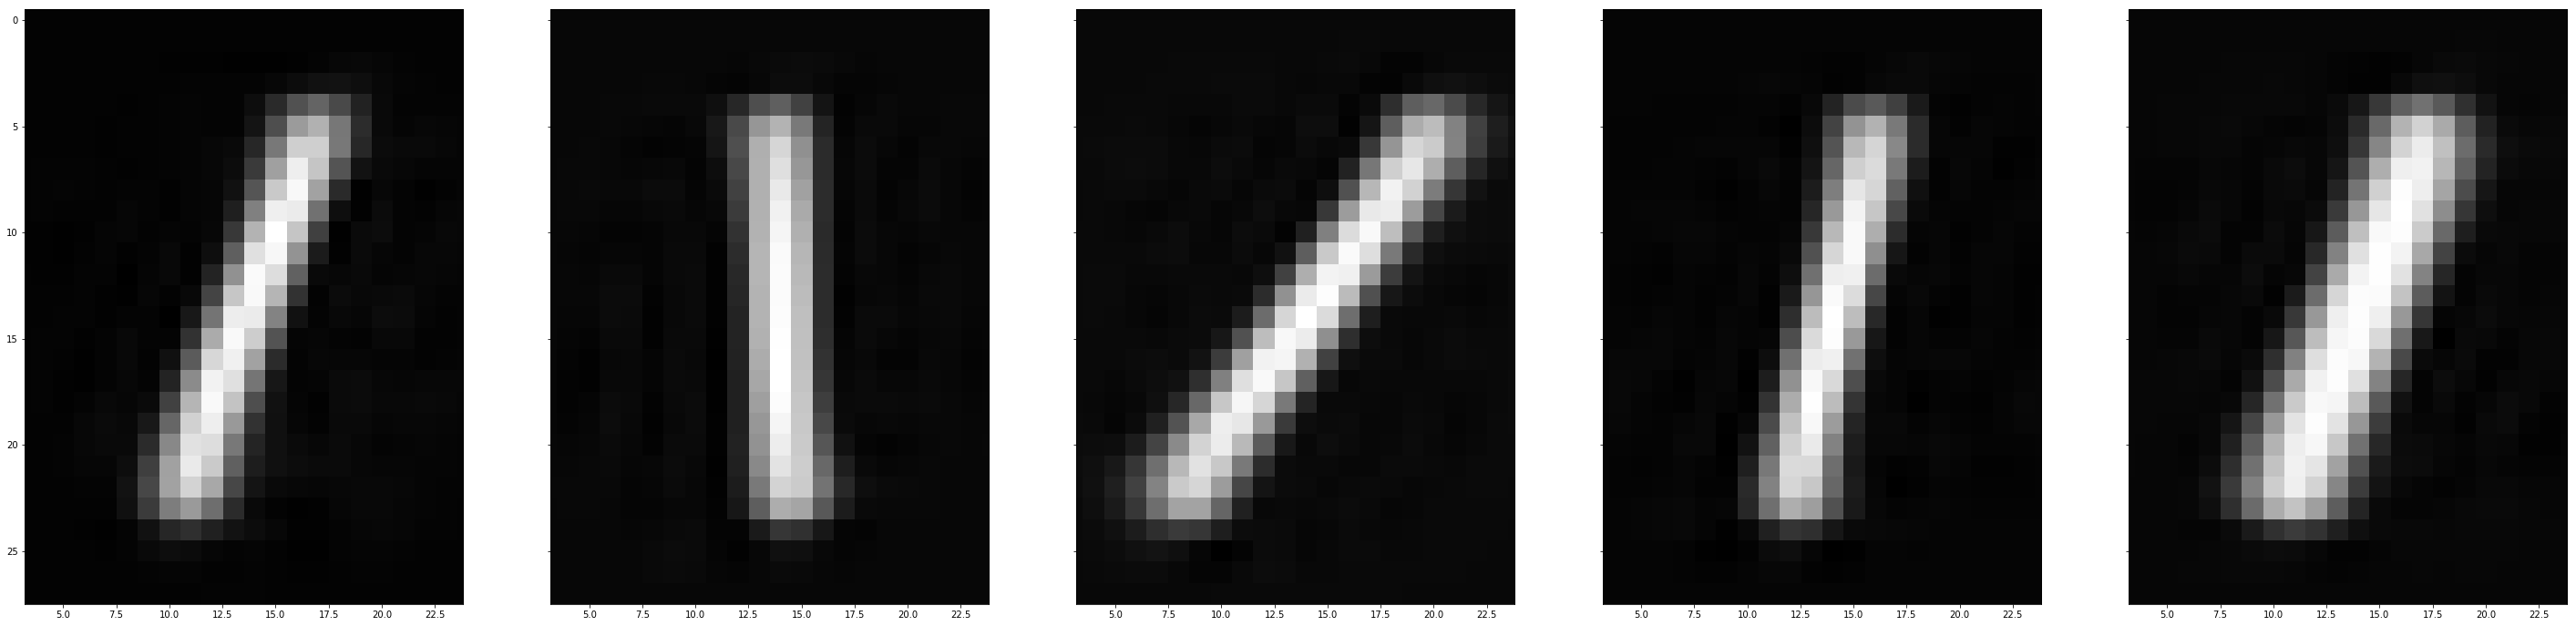

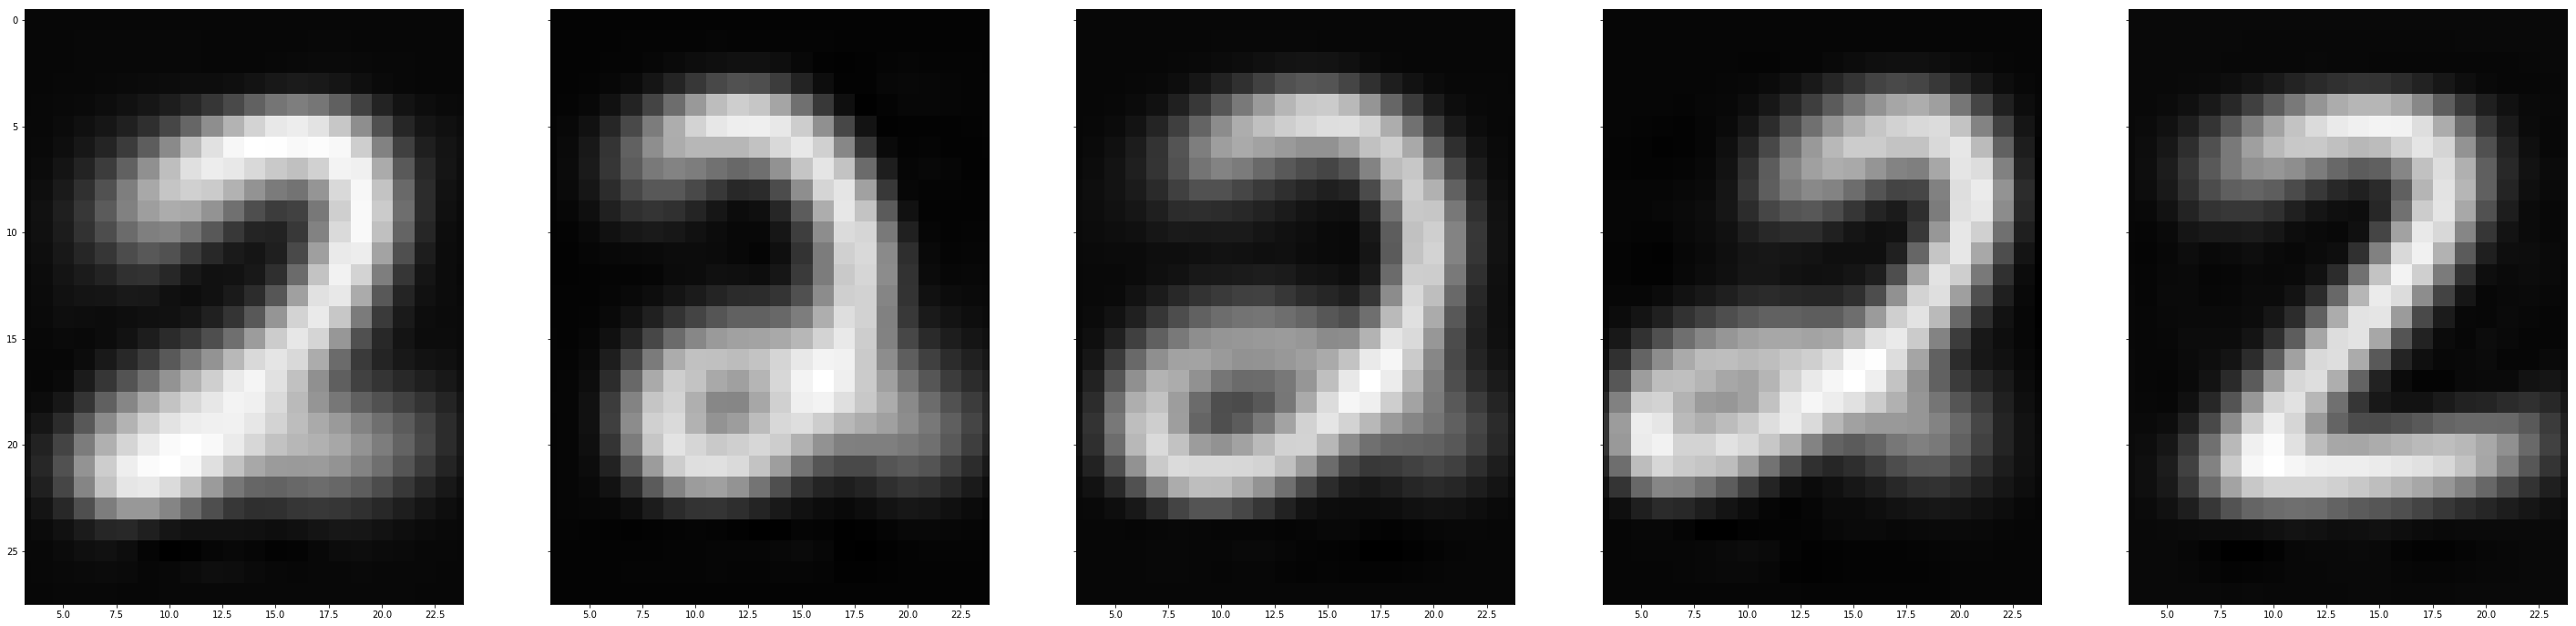

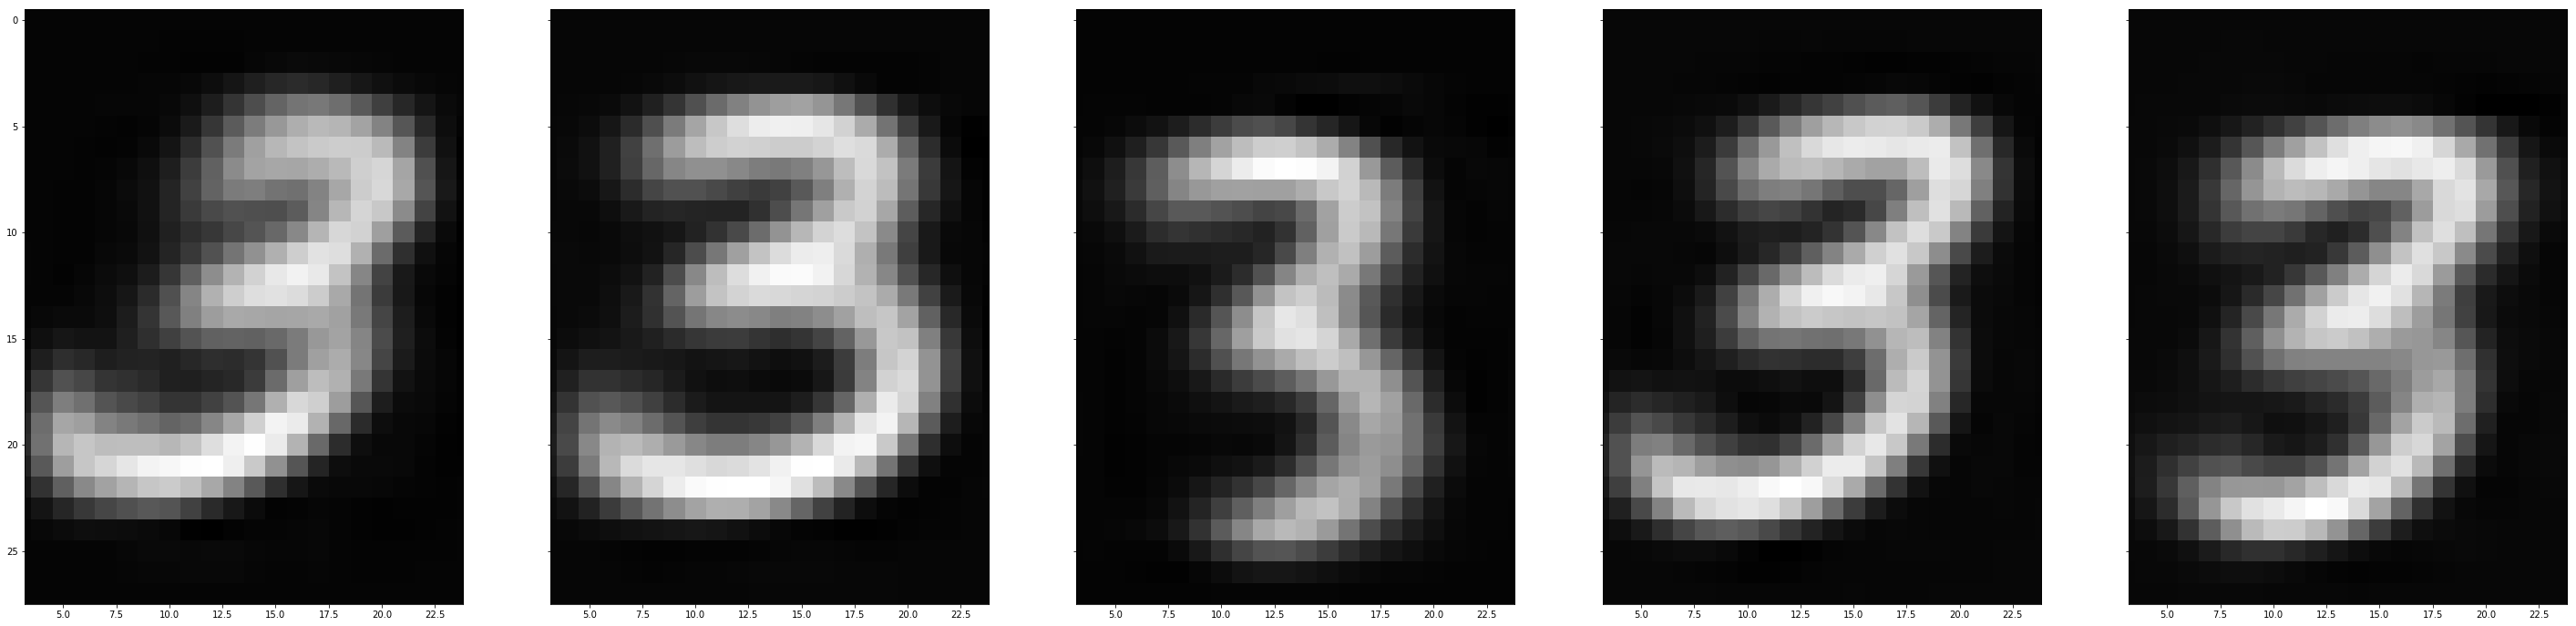

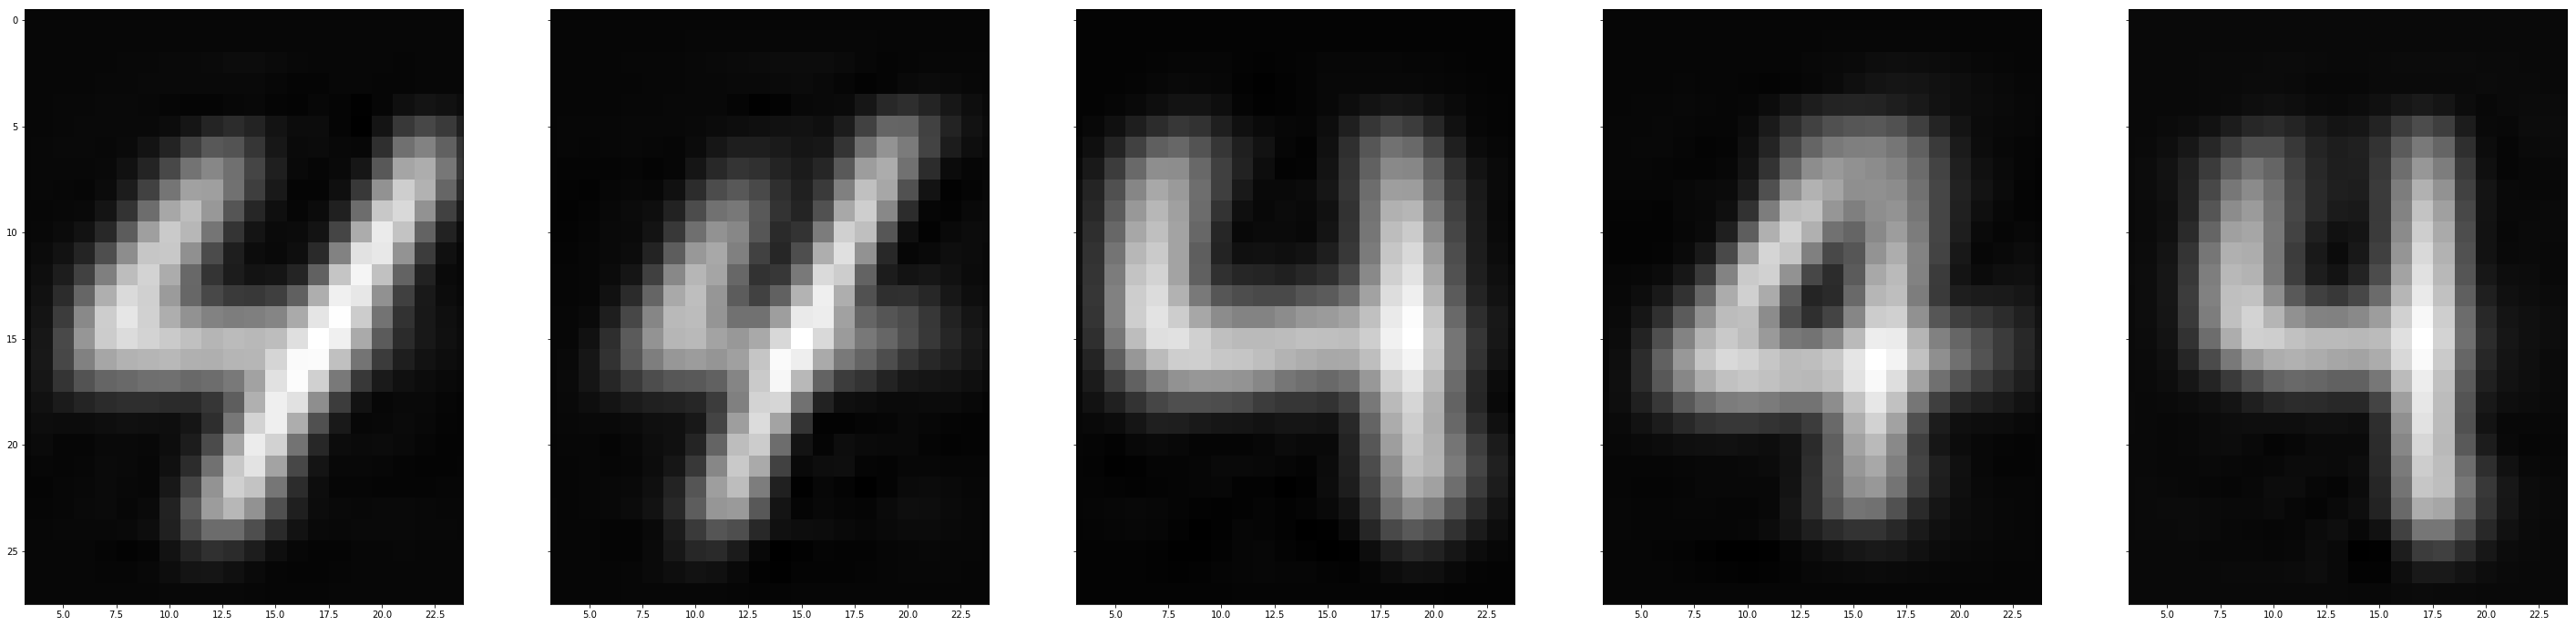

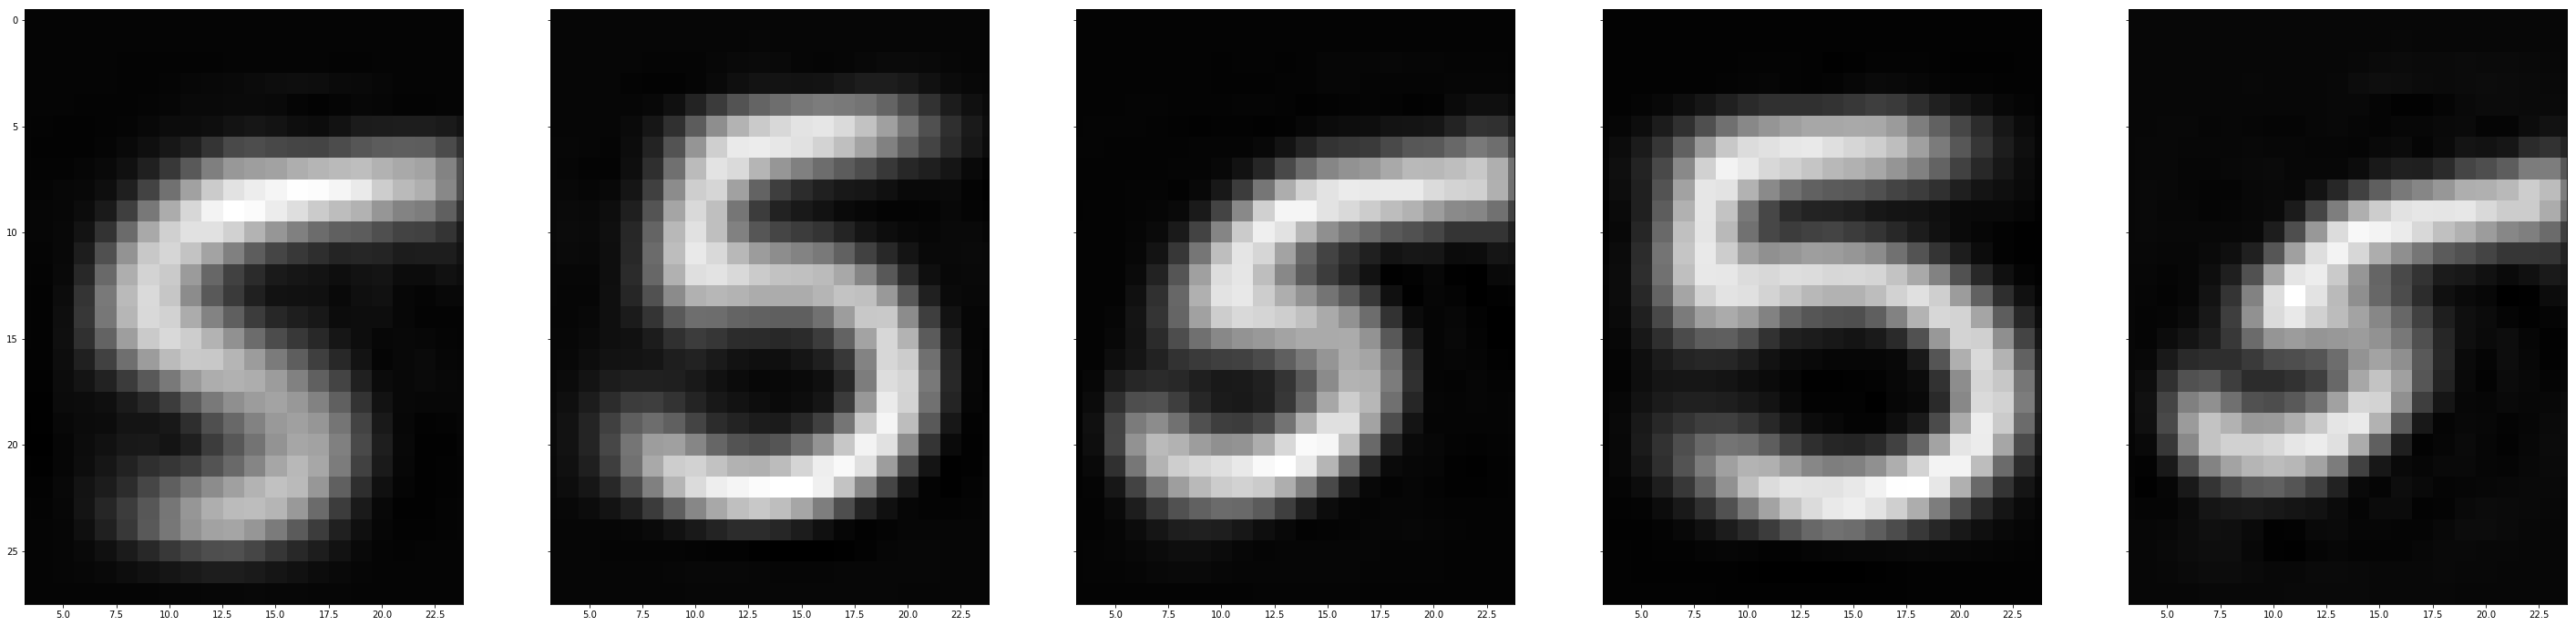

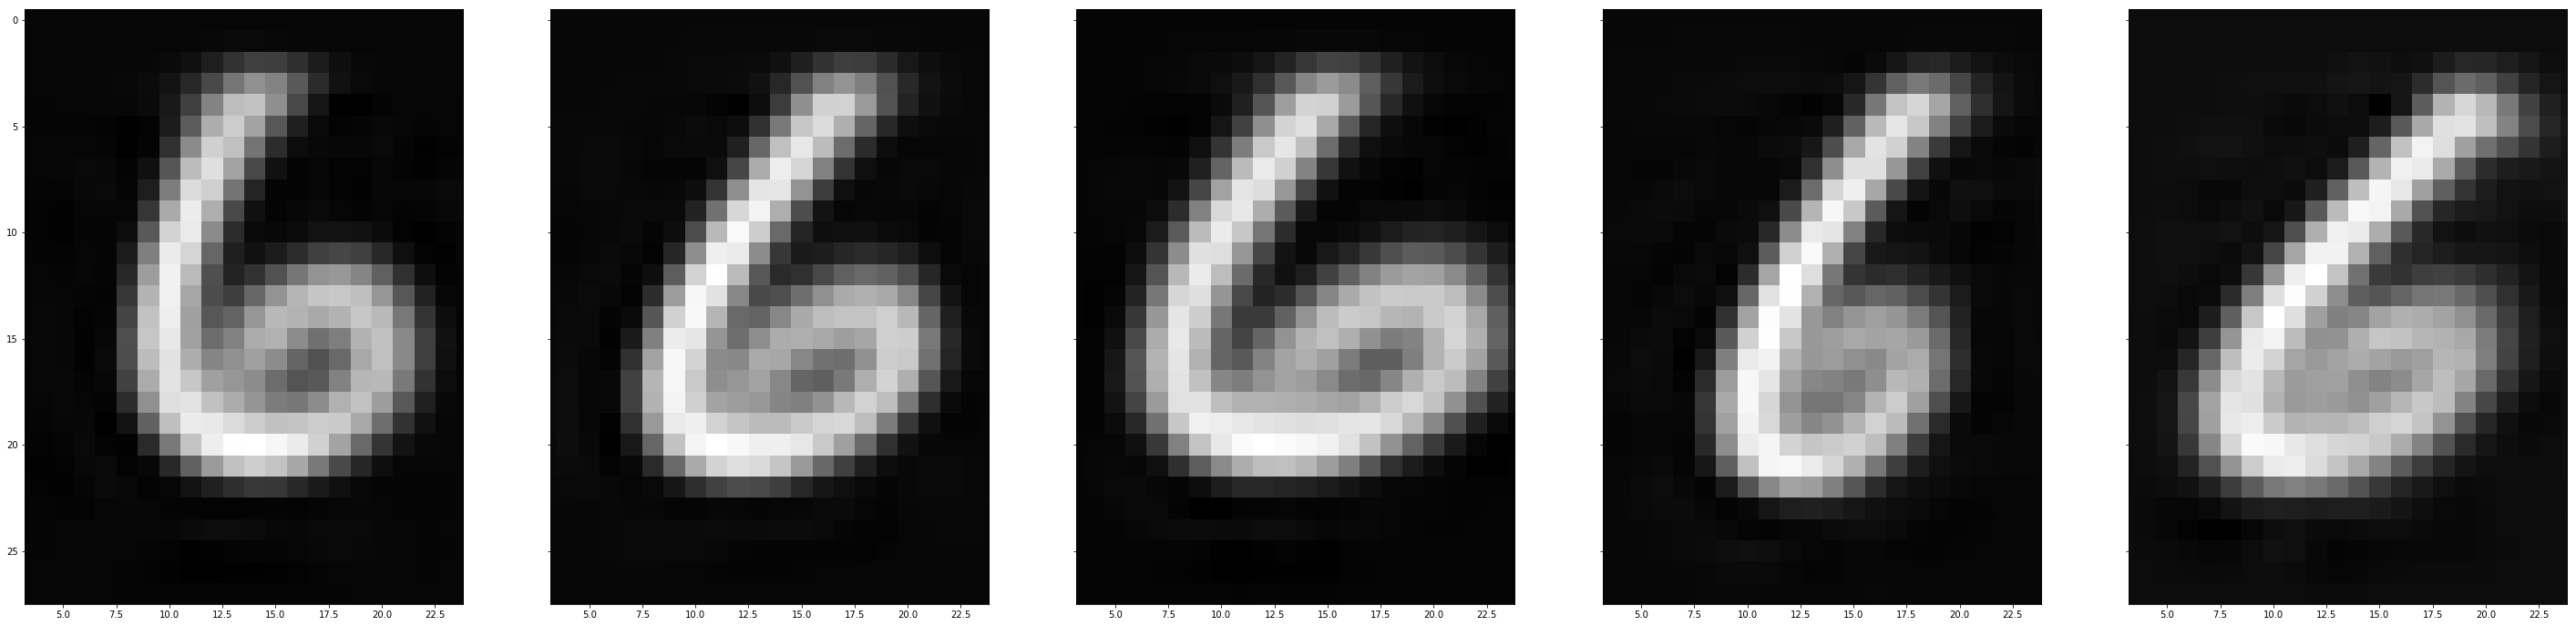

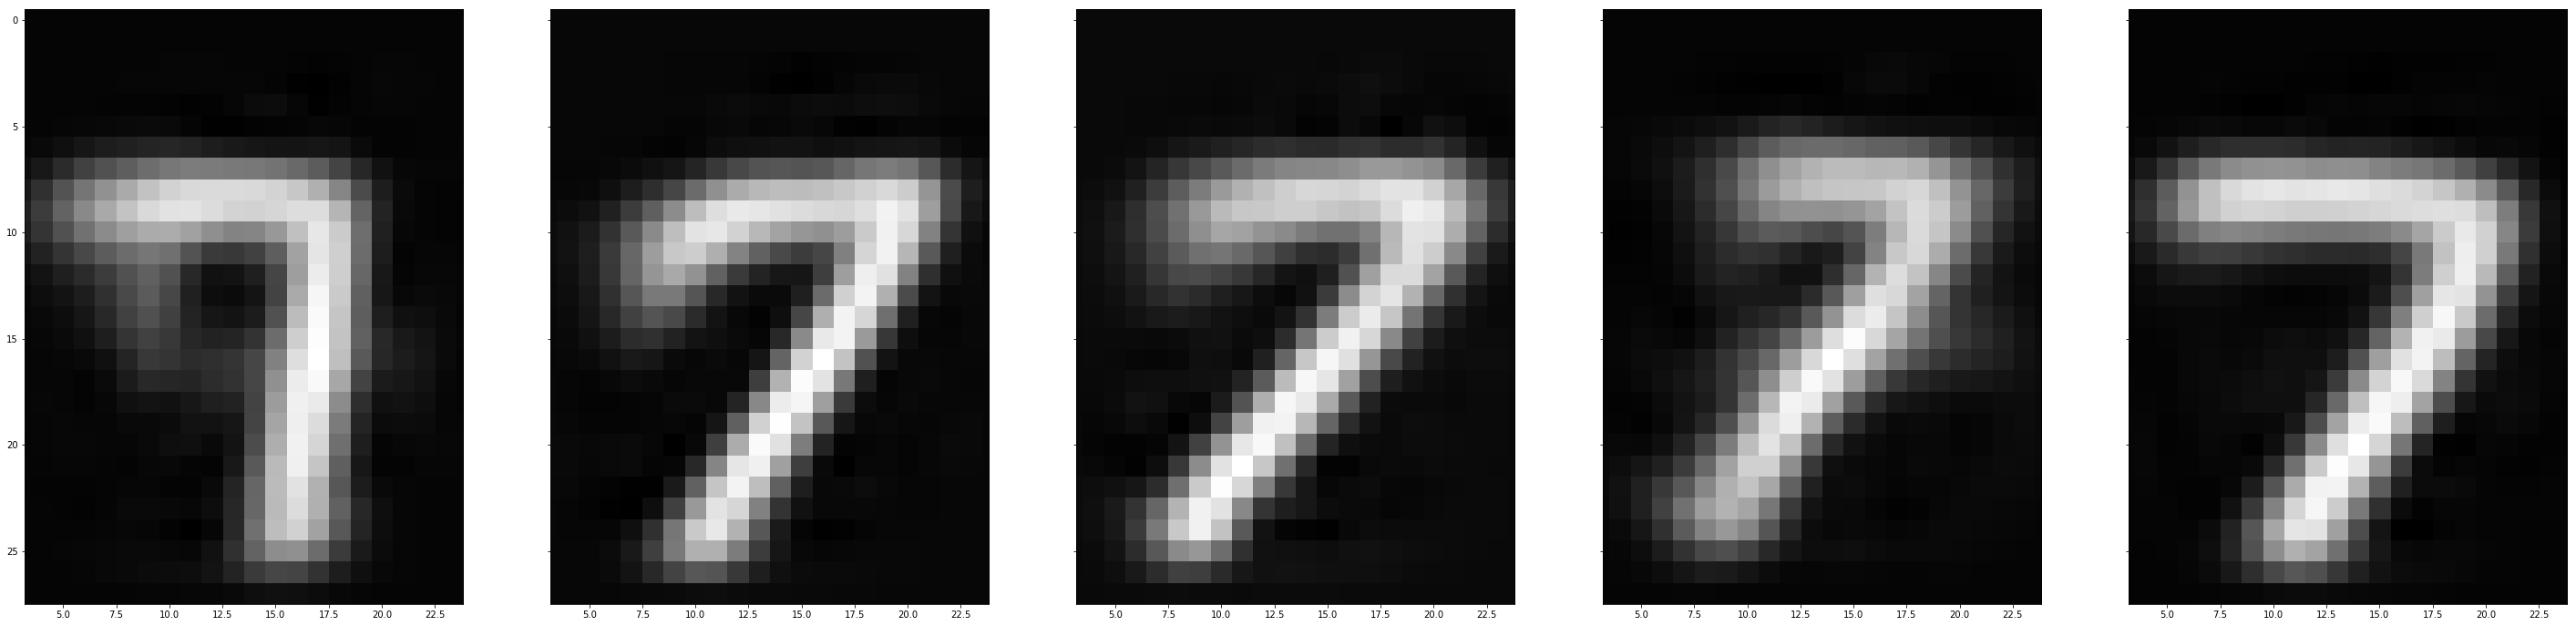

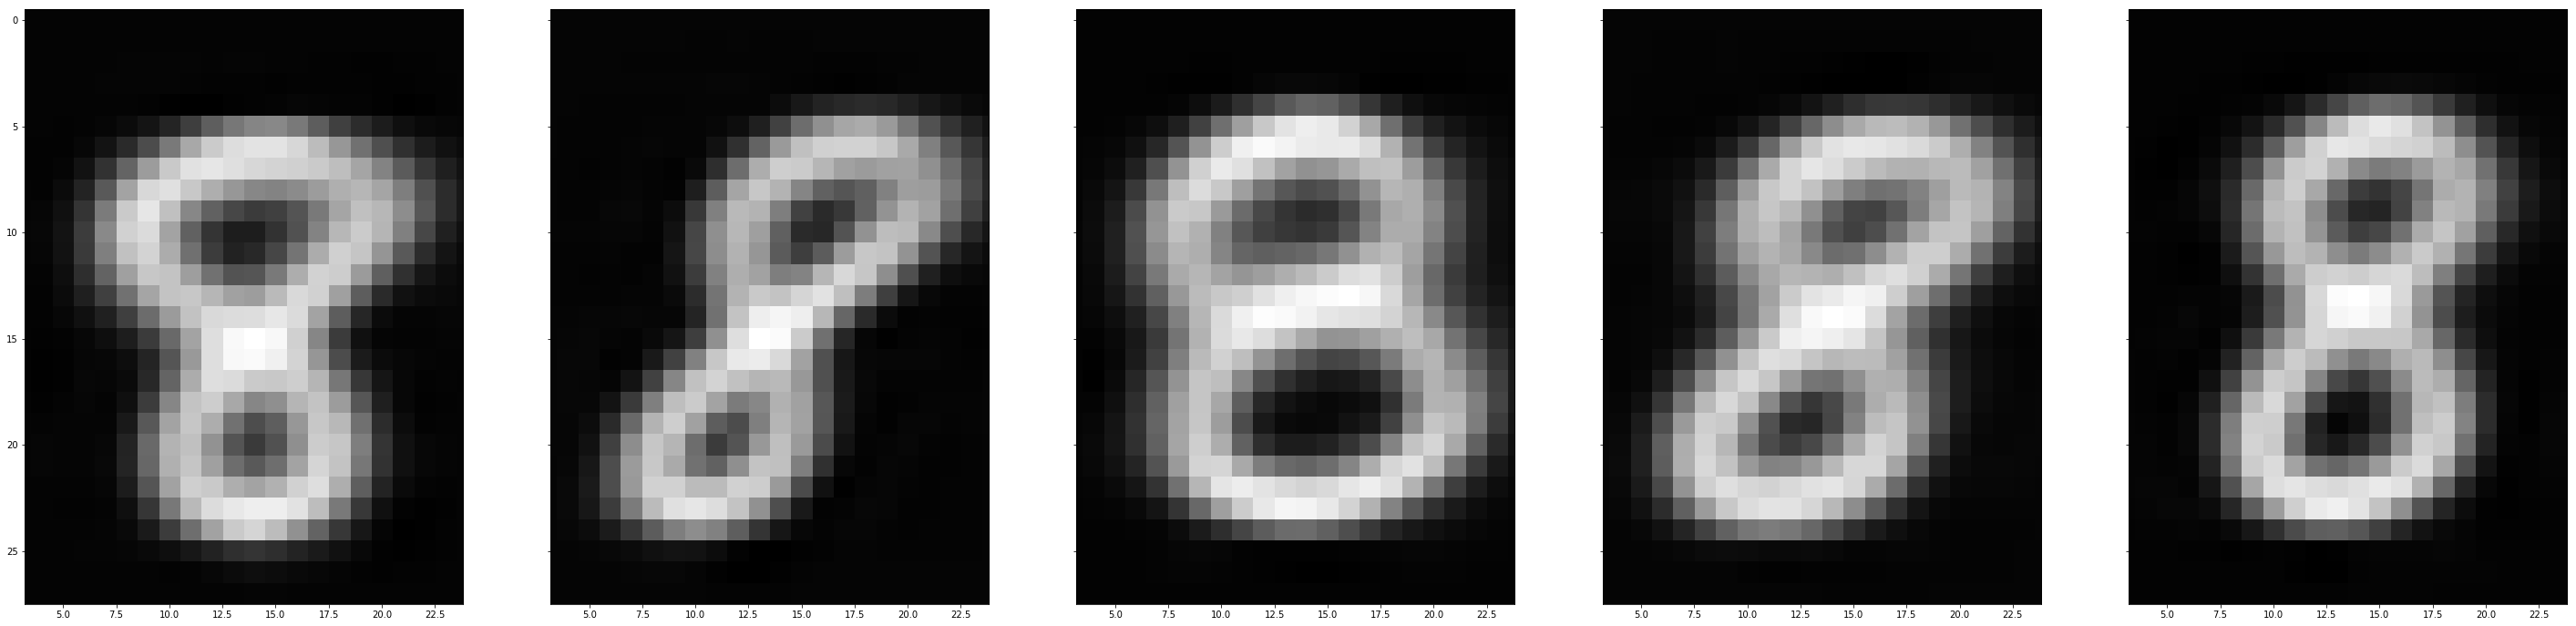

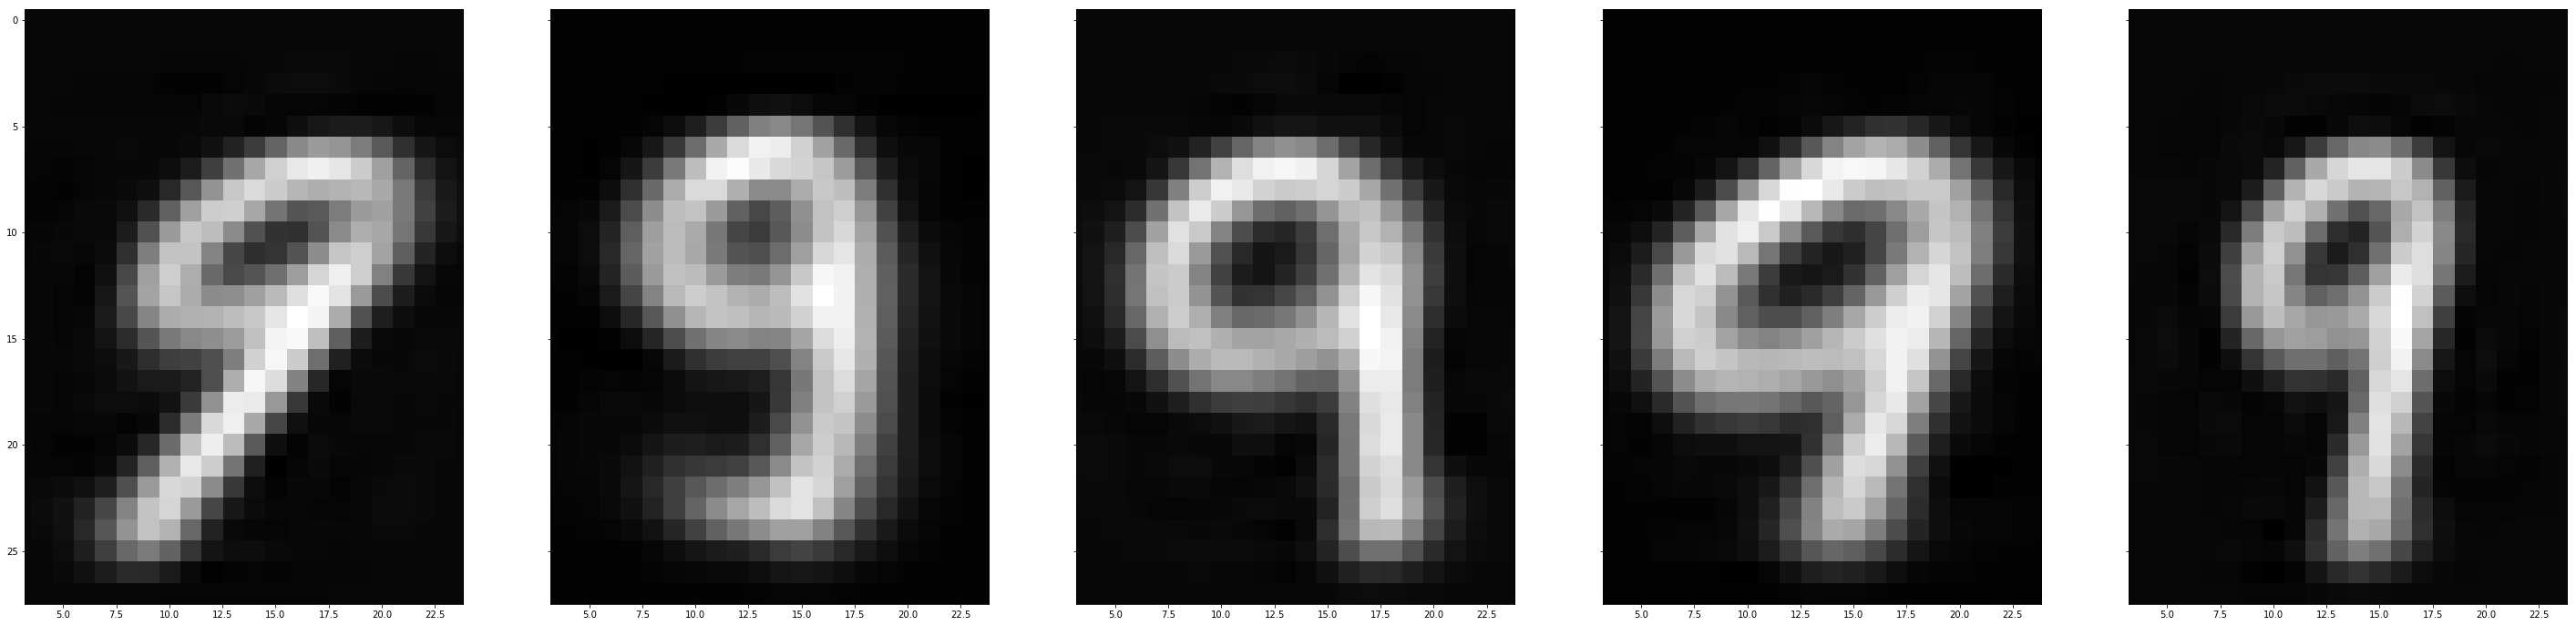

In [125]:
%pylab inline
pylab.rcParams['figure.figsize'] = (50, 12)

for j in range(0, 10):
    f, axarr = plt.subplots(1, 5, sharey=True)

    mean_values = gaussian_mixtures[j].means_

    for i in range(0, 5):
        mean_value = mean_values[i]
        axarr[i].imshow(np.reshape(pca.inverse_transform(mean_value) + 123, (train_set.rows, train_set.cols)), cmap='gray')

    plt.show()

In [137]:
test_scores = []

for i in range(0, 10):
    test_scores.append(gaussian_mixtures[i].score_samples(test_images_pca))

In [145]:
print(test_scores[1][7])

-1059.36602026


In [148]:
label_predictions = []

for i in range(0, test_images_pca.shape[0]):
    
    scores = []
    for j in range(0, 10):
        scores.append(test_scores[j][i])
    
    predicted_class = scores.index(max(scores))
    label_predictions.append([test_set.labels[i], predicted_class])

In [149]:
def get_confusion_matrix(n_classes, label_predictions):
    ret = np.zeros((n_classes, n_classes))
    for label_prediction in label_predictions:
        label = label_prediction[0]
        prediction = label_prediction[1]
        ret[label, prediction] += 1
    return ret

In [150]:
def get_error_ratio(label_predictions):
    n_errors = 0
    for label_prediction in label_predictions:
        label = label_prediction[0]
        prediction = label_prediction[1]
        if label != prediction:
            n_errors += 1
    return float(n_errors) / float(len(label_predictions))

In [151]:
confusion_matrix = get_confusion_matrix(10, label_predictions)

In [152]:
np.set_printoptions(suppress=True, threshold=10000)
print(confusion_matrix)

[[  974.     0.     2.     1.     0.     1.     0.     0.     2.     0.]
 [    0.  1085.    15.     1.     3.     0.     4.     0.    27.     0.]
 [    2.     0.  1011.     0.     0.     0.     0.     2.    17.     0.]
 [    0.     0.     3.   988.     0.     6.     0.     1.    12.     0.]
 [    1.     0.     3.     0.   947.     0.     2.     6.    11.    12.]
 [    0.     0.     0.    23.     0.   834.     2.     0.    33.     0.]
 [    8.     2.     1.     0.     2.     6.   930.     1.     8.     0.]
 [    1.     1.    26.     1.     3.     0.     0.   956.    12.    28.]
 [    1.     0.     1.     5.     0.     2.     0.     0.   964.     1.]
 [    3.     1.     4.    13.    11.     1.     0.     4.    20.   952.]]


In [153]:
error_ratio = get_error_ratio(label_predictions)

In [154]:
print(error_ratio)

0.0359
